In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



pd.set_option("display.max_columns", 90)
pd.set_option("display.max_rows", 185)


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Financial Distress.csv")

### Transform the target into 0s and 1s

In [3]:
def new_labels(row):
    return 0 if row["Financial Distress"] > -0.5 else 1

In [4]:

df["Financial Distress"] = df.apply(new_labels, axis=1)

In [5]:
df["Financial Distress"].value_counts()

0    3536
1     136
Name: Financial Distress, dtype: int64

### Split the data into train and test sets

In [6]:
X = df.iloc[:,3:]
Y = df["Financial Distress"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [8]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.sort_index(inplace=True)

In [9]:
X_train.sort_index(inplace=True)
y_train.sort_index(inplace=True)
train_data = pd.concat([X_train, y_train], axis=1)

<ipython-input-9-2444e6b3f6d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.sort_index(inplace=True)


In [10]:
y_train.value_counts()

0    2487
1      83
Name: Financial Distress, dtype: int64

In [11]:
X_train.describe().loc[["min", "max", "mean"]]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
min,0.075170,-0.247880,0.016135,5.350000e-07,-0.269790,-0.627750,0.039691,-145000.000000,-3.498500,-0.25648,0.021491,-2.620000e+06,0.036667,0.016400,3.540000e-06,-35758.000000,0.000000e+00,0.000287,0.000000,0.000603,0.000003,7.730000e-07,-0.553850,0.016135,-2302.800000,8.195100,-288000.000000,-0.499440,0.00000,0.002082,0.000000e+00,0.010060,0.049372,4.560000e-05,0.000000e+00,-4.856200,0.000000,0.000244,-1.000000,0.000170,0.000002,-214.820000,0.089251,-56.719000,-9.376900,-0.642120,1.640100e-02,533.07000,0.016400,0.000000,0.000000,-33563.000000,-0.225220,0.012658,-1.000000,0.000000,-0.998710,-0.27926,-7872.00000,-0.349060,-7.714000,-11.824000,-25.736000,-21.411000,-21.90700,15.91600,10.300000,7941.800000,-58.122000,10.400000,-10.665000,0.000000,22.000000,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
max,51.954000,0.740320,0.963330,6.835600e+00,0.647010,0.929550,38.836000,209000.000000,2.892200,0.76962,0.998110,3.830000e+07,0.983860,26.272000,3.960000e+06,42180.000000,3.540000e+06,0.596550,140000.000000,5.964600,13.398000,1.072100e+04,1.000000,0.932900,79551.000000,19.009000,2482.300000,4.625400,0.68071,0.948000,3.610000e+08,312000.000000,1.000000,4.350000e+06,1.020000e+08,5.766100,6.646800,12494.000000,290000.000000,0.977760,56.913000,482.600000,5731.700000,3201.900000,3.496000,34.063000,1.660000e+06,136000.00000,19.625000,1.553800,19.809000,46045.000000,0.904560,342000.000000,1.000000,0.806430,786.250000,0.24727,1.40290,0.863320,7.416600,15.381000,14.321000,18.770000,124.76000,39.43200,13.850000,34501.000000,364.950000,34.700000,61.476000,4.000000,36.750000,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,73.000000
mean,1.401391,0.129969,0.614478,8.736285e-01,0.154939,0.108153,0.792444,56.976937,0.330593,0.13765,0.638430,1.302164e+05,0.385522,2.389097,8.983965e+03,-24.459713,2.423283e+03,0.041940,110.777881,0.106353,1.457453,1.578174e+01,0.272809,0.530278,1005.214993,13.278748,-116.211357,0.202216,0.08420,0.354331,4.592202e+05,424.209227,0.862016,3.224794e+03,6.415663e+04,0.241008,0.307843,15.481594,114.194077,0.260505,3.022500,0.738844,12.148407,3.528729,0.153273,0.307177,1.673733e+03,2490.91428,2.081255,0.727191,12.911536,-20.358305,0.207386,3682.663322,0.007861,0.236839,0.627828,-0.00979,-3.71581,0.113702,2.723413,3.466554,1.417702,-0.624893,31.00526,28.18821,11.448807,15835.009261,20.409864,17.809635,23.540521,1.921821,30.390444,86.786278,91.850979,89.040949,17.781016,15.215709,-2.593925,19.575486,1.115854,13.151751,32.953307


In [12]:
# columns who might have outliers

cols_to_check = ["x1", "x7", "x14", "x15", "x19", "x20", "x21", "x22", "x25", "x27", "x28", 
                "x32", "x37", "x38", "x39", "x41", "x43", "x44", "x46", "x48", "x49", "x54", "x57", "x59", "x81",]

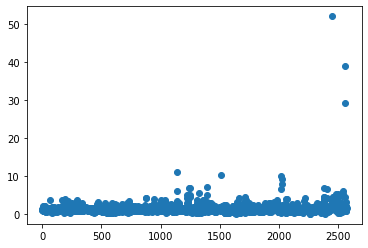

In [13]:
# plot x1 as an example
plt.scatter(x=range(len(y_train)), y=X_train['x1'])

In [14]:
def plot_outlier_cols(data, columns, n=1):
    
    plt.figure(figsize=(20,10))
    
    for col in columns:
        
        
        plt.subplot(5,6,n)
        data[col].plot(ax=plt.gca())
        plt.legend()
        
        n += 1

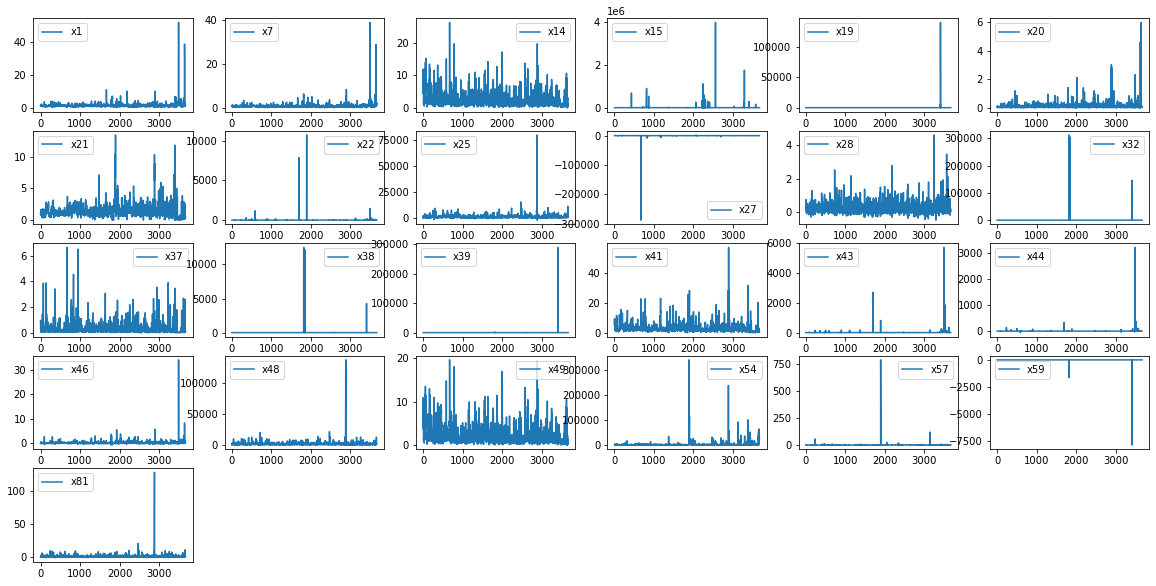

In [15]:
plot_outlier_cols(X_train, cols_to_check)

Here we can see that there are outliers on most of the plots. <br>
In addition a particular row is causing noise on multiple features <br>
To solve this problem, later, I am going to perform standardization of the independent variables

### Simple Feature engineering

- I am going to discard the features that have an absolute correlation score of 0.1 or less towards the target <br>
- Then I am going to check the rest of the features with a confusion matrix, and see if there are high correlations between the independent features themselves

In [16]:
train_data.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61',
       'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71',
       'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81',
       'x82', 'x83', 'Financial Distress'],
      dtype='object')

In [17]:
corr_matrix = train_data.corr()

In [18]:
# print how many features are left after performing the correlation analysis
target_corr = abs(corr_matrix["Financial Distress"]).sort_values(ascending=False)
criteria = list(target_corr > 0.1)
features = list(target_corr[criteria].index)[1:]
len(features)

19

In [19]:
corr_features_matrix = train_data[features].corr()

Now on the remaining 19 features I am going to check for similarities between them and will discard those who have strong correlation (positive or negative)

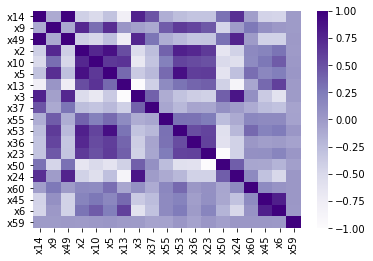

In [20]:
sns.heatmap(train_data[features].corr(), cmap="Purples")

Seems like there is a strong positive correlation between features <br>
- x14 and x49; x14 and x3; x14 and x24; <br>
- x2 and x5; x2 and x10; x6 and x45


strong negative correlated features are: <br>

- x3 and x13; x23 and x50

Based on that I decide to remove the following features: x49, x3, x24, x5, x10, x45, x50

In [21]:
# print the number of features remaining after the feature engineering
features_to_drop = ["x49", "x3", "x24", "x5", "x10", "x45", "x50"]
features_selected = [col for col in features if col not in features_to_drop]
len(features_selected)

12

In [22]:
X_train_final = X_train[features_selected]
X_test_final = X_test[features_selected]

## Over-sampling

Before doing standardization I am going to balance the target classes by oversampling the training data. For this I am going to use SMOTE algorithm

In [23]:
os = SMOTE(random_state=42)

os_data_X_tr, os_data_y_tr = os.fit_sample(X_train_final, y_train)
os_data_X_tr = pd.DataFrame(data=os_data_X_tr ,columns=features_selected)
os_data_y_tr = pd.DataFrame(data=os_data_y_tr, columns=["Financial Distress"])


# we can Check the numbers of our data

print("Length of the normal data: ",len(X_train_final))

print("Length of the oversampled data: ",len(os_data_X_tr))

print("Number of 0s before: ", len(y_train[y_train==0]))

print("Number of 0s in oversampled data: ",
      len(os_data_y_tr[os_data_y_tr["Financial Distress"]==0]))

print("Number of 1s before: ", len(y_train[y_train==1]))

print("Number of 1s in oversampled data: ",len(os_data_y_tr[os_data_y_tr["Financial Distress"]==1]))


print("Proportion of 0s in oversampled data is: ",
      len(os_data_y_tr[os_data_y_tr["Financial Distress"]==0])/len(os_data_X_tr))

print("Proportion of 1s in oversampled data is: ",
      len(os_data_y_tr[os_data_y_tr["Financial Distress"]==1])/len(os_data_X_tr))



Length of the normal data:  2570
Length of the oversampled data:  4974
Number of 0s before:  2487
Number of 0s in oversampled data:  2487
Number of 1s before:  83
Number of 1s in oversampled data:  2487
Proportion of 0s in oversampled data is:  0.5
Proportion of 1s in oversampled data is:  0.5


In [24]:
os_data_X_tr.shape

(4974, 12)

## Standardization of the data

In [25]:
scaler = StandardScaler()

os_X_train_scaled = scaler.fit_transform(os_data_X_tr)
os_X_train = pd.DataFrame(data=os_X_train_scaled, columns=features_selected)
os_y_train_values = os_data_y_tr.values.ravel()


In [26]:
os_X_train.describe()

,x14,x9,x2,x13,x37,x55,x53,x36,x23,x60,x6,x59
count,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03
mean,-1.667343e-16,-3.329107e-17,-1.106006e-15,-1.114666e-16,-7.934947e-16,-3.873728e-15,-4.380850e-16,-3.422183e-16,4.529728e-16,3.602355e-15,-4.524817e-16,-5.453351e-16
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-1.165988e+00,-9.087248e+00,-2.589667e+00,-1.469586e+00,-8.297688e-01,-1.350105e+00,-3.104037e+00,-1.788510e+01,-4.883265e+00,-4.172429e+00,-3.372043e+00,-1.622336e+01
25%,-7.172852e-01,-5.615063e-01,-6.893668e-01,-7.711858e-01,-6.051232e-01,-1.060448e+00,-7.303565e-01,-5.243490e-01,-6.756322e-01,-7.536450e-01,-5.995355e-01,7.623240e-02
50%,-2.787125e-01,2.911023e-02,-2.574023e-01,-2.557895e-01,-2.734711e-01,1.690770e-01,-2.300702e-01,-2.498695e-01,-1.939543e-01,-4.360867e-01,-1.614457e-03,7.627555e-02
75%,3.892654e-01,5.747676e-01,4.605222e-01,5.810190e-01,1.463412e-01,6.713299e-01,4.803598e-01,2.454486e-01,4.682897e-01,8.585566e-01,5.707663e-01,7.628809e-02
max,6.506904e+00,7.048658e+00,5.782289e+00,3.989731e+00,1.016117e+01,2.114126e+00,6.232450e+00,2.037616e+01,5.178056e+00,7.701935e+00,4.379431e+00,7.919291e-02


### Test some models

In [27]:
sgd_clf = SGDClassifier(max_iter=1000, tol=-np.infty, random_state=24)
log_reg_clf = LogisticRegression()
forest_clf = RandomForestClassifier(n_estimators=10, random_state=24)
gr_boost_clf = GradientBoostingClassifier()
xgb_clf = XGBClassifier()
lgbm_clf = LGBMClassifier()

In [28]:
def select_model(model, X, y, predict_proba=False):
    
    model.fit(X, y)
    model_score = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    
    y_model_predict = cross_val_predict(model, X, y, cv=10)
    
    if predict_proba:
        y_probas = cross_val_predict(model, X, y, cv=10,
                             method="predict_proba")
        y_scores = y_probas[:, 1]
    else:
        y_scores = cross_val_predict(model, X, y, cv=10,
                             method="decision_function")
    
    
    conf_matrix = confusion_matrix(y, y_model_predict)
    precision_sc = precision_score(y, y_model_predict)
    recall_sc = recall_score(y, y_model_predict)
    f1_sc = f1_score(y, y_model_predict)
    
    
    print(f" Results for the {model} are:")
    print()
    print(f" Accuracy score: {model_score.mean()}")
    print()
    print(f" Confusion matrix: \n {conf_matrix}")
    print()
    print(f" Precision: {precision_sc}")
    print(f" Recall: {recall_sc}")
    print(f" F1 score: {f1_sc}")
    
    return y_scores, y_model_predict

In [29]:
y_scores_sgd, y_predict_sgd = select_model(sgd_clf, os_X_train, os_y_train_values)

 Results for the SGDClassifier(random_state=24, tol=-inf) are:

 Accuracy score: 0.8950587056475398

 Confusion matrix: 
 [[2107  380]
 [ 142 2345]]

 Precision: 0.8605504587155963
 Recall: 0.9429030960997186
 F1 score: 0.899846508058327


In [30]:
y_scores_log_reg, y_predict_log_reg = select_model(log_reg_clf, os_X_train, os_y_train_values)

 Results for the LogisticRegression() are:

 Accuracy score: 0.8841987668985801

 Confusion matrix: 
 [[2135  352]
 [ 224 2263]]

 Precision: 0.8653919694072658
 Recall: 0.9099316445516686
 F1 score: 0.8871030968247745


In [31]:
y_scores_forest, y_predict_forest = select_model(forest_clf, os_X_train, os_y_train_values, predict_proba=True)

 Results for the RandomForestClassifier(n_estimators=10, random_state=24) are:

 Accuracy score: 0.9646174234159979

 Confusion matrix: 
 [[2357  130]
 [  46 2441]]

 Precision: 0.9494360171139634
 Recall: 0.981503819863289
 F1 score: 0.9652036378015025


In [32]:
y_scores_grb, y_predict_grb = select_model(gr_boost_clf, os_X_train, os_y_train_values, predict_proba=True)

 Results for the GradientBoostingClassifier() are:

 Accuracy score: 0.9429056265302659

 Confusion matrix: 
 [[2241  246]
 [  38 2449]]

 Precision: 0.9087198515769944
 Recall: 0.9847205468435867
 F1 score: 0.9451949054419143


In [33]:
y_scores_xgb, y_predict_xgb = select_model(xgb_clf, os_X_train, os_y_train_values, predict_proba=True)

 Results for the XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) are:

 Accuracy score: 0.9712532221441096

 Confusion matrix: 
 [[2355  132]
 [  11 2476]]

 Precision: 0.9493865030674846
 Recall: 0.9955770004020909
 F1 score: 0.9719332679097155


In [34]:
y_scores_lgbm, y_predict_lgbm = select_model(lgbm_clf, os_X_train, os_y_train_values, predict_proba=True)

 Results for the LGBMClassifier() are:

 Accuracy score: 0.9704492012314854

 Confusion matrix: 
 [[2351  136]
 [  11 2476]]

 Precision: 0.9479326186830015
 Recall: 0.9955770004020909
 F1 score: 0.9711708178074132


### Precision-Recall and ROC Curves

Below there is a comparison for all of the models with the usage of PR and ROC Curves

In [35]:
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(os_y_train_values, y_scores_sgd)
precisions_log_reg, recalls_log_reg, thresholds_log_reg = precision_recall_curve(os_y_train_values, y_scores_log_reg)
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(os_y_train_values, y_scores_forest)
precisions_grb, recalls_grb, thresholds_grb = precision_recall_curve(os_y_train_values, y_scores_grb)
precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(os_y_train_values, y_scores_xgb)
precisions_lgbm, recalls_lgbm, thresholds_lgbm = precision_recall_curve(os_y_train_values, y_scores_lgbm)

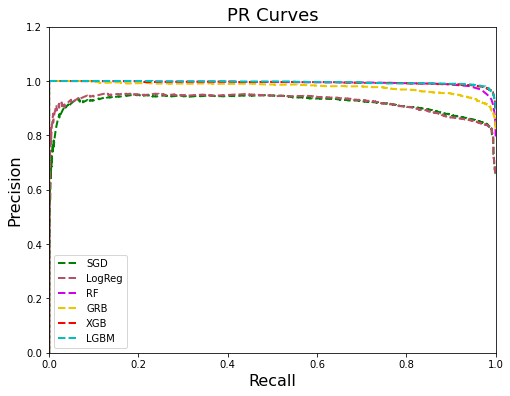

In [36]:
def plot_precision_vs_recall(precisions, recalls, color="g", label=None):
    plt.plot(recalls, precisions, color=color, linestyle='dashed', linewidth=2, label=label)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.title("PR Curves", fontsize=18)
    plt.ylim(0, 1.2)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_sgd, recalls_sgd, label="SGD")
plot_precision_vs_recall(precisions_log_reg, recalls_log_reg, color="#b55167", label="LogReg")
plot_precision_vs_recall(precisions_forest, recalls_forest, color="#d000eb", label="RF")
plot_precision_vs_recall(precisions_grb, recalls_grb, color="#ebc700", label="GRB")
plot_precision_vs_recall(precisions_xgb, recalls_xgb, color="r", label="XGB")
plot_precision_vs_recall(precisions_lgbm, recalls_lgbm, color="c", label="LGBM")
plt.legend()
plt.show()

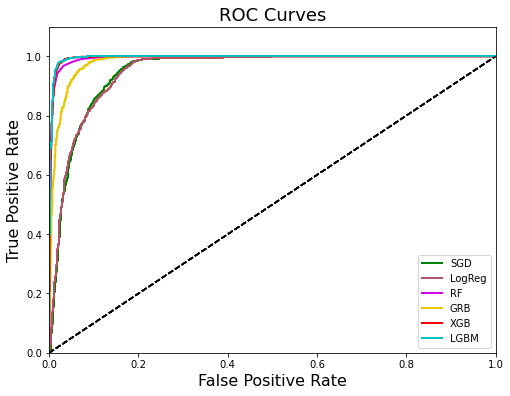

In [37]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(os_y_train_values, y_scores_sgd)
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(os_y_train_values, y_scores_log_reg)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(os_y_train_values, y_scores_forest)
fpr_grb, tpr_grb, thresholds_grb = roc_curve(os_y_train_values, y_scores_grb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(os_y_train_values, y_scores_xgb)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(os_y_train_values, y_scores_lgbm)

def plot_roc_curve(fpr, tpr, color="g", label=None):
    plt.plot(fpr, tpr, linewidth=2, color=color, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title("ROC Curves", fontsize=18)
    plt.ylim(0, 1.1)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd, label="SGD")
plot_roc_curve(fpr_log_reg, tpr_log_reg, color="#b55167", label="LogReg")
plot_roc_curve(fpr_forest, tpr_forest, color="#d000eb", label="RF")
plot_roc_curve(fpr_grb, tpr_grb, color="#ebc700", label="GRB")
plot_roc_curve(fpr_xgb, tpr_xgb, color="r", label="XGB")
plot_roc_curve(fpr_lgbm, tpr_lgbm, color="c", label="LGBM")
plt.legend()
plt.show()

In [38]:
print(f" ROC AUC Score SGD: {roc_auc_score(os_y_train_values, y_scores_sgd)}")
print(f" ROC AUC Score LogReg: {roc_auc_score(os_y_train_values, y_scores_log_reg)}")
print(f" ROC AUC Score RF: {roc_auc_score(os_y_train_values, y_scores_forest)}")
print(f" ROC AUC Score GRB: {roc_auc_score(os_y_train_values, y_scores_grb)}")
print(f" ROC AUC Score XGB: {roc_auc_score(os_y_train_values, y_scores_xgb)}")
print(f" ROC AUC Score LGBM: {roc_auc_score(os_y_train_values, y_scores_lgbm)}")

 ROC AUC Score SGD: 0.9497303954022922
 ROC AUC Score LogReg: 0.9498450244447646
 ROC AUC Score RF: 0.9937472201648816
 ROC AUC Score GRB: 0.9838629308269506
 ROC AUC Score XGB: 0.9956202490182564
 ROC AUC Score LGBM: 0.9961496605832436


## Make predictions with all classifiers

In [39]:
y_sgd_predict = sgd_clf.predict(X_test_final)
n_correct_sgd = sum(y_sgd_predict == y_test)

y_log_reg_predict = log_reg_clf.predict(X_test_final)
n_correct_log_reg = sum(y_log_reg_predict == y_test)

y_forest_predict = forest_clf.predict(X_test_final)
n_correct_forest = sum(y_forest_predict == y_test)

y_grb_predict = gr_boost_clf.predict(X_test_final)
n_correct_grb = sum(y_grb_predict == y_test)

y_xgb_predict = xgb_clf.predict(X_test_final)
n_correct_xgb = sum(y_xgb_predict == y_test)

y_lgbm_predict = lgbm_clf.predict(X_test_final)
n_correct_lgbm = sum(y_lgbm_predict == y_test)

print("Prediction Scores:")
print(f"SGD: {(n_correct_sgd / len(y_sgd_predict))}")
print(f"LogReg: {(n_correct_sgd / len(y_log_reg_predict))}")
print(f"RF: {(n_correct_forest / len(y_forest_predict))}")
print(f"GRB: {(n_correct_grb / len(y_grb_predict))}")
print(f"XGB: {(n_correct_xgb / len(y_xgb_predict))}")
print(f"LGBM: {(n_correct_lgbm / len(y_lgbm_predict))}")

Prediction Scores:
SGD: 0.9500907441016334
LogReg: 0.9500907441016334
RF: 0.9537205081669692
GRB: 0.941016333938294
XGB: 0.6397459165154264
LGBM: 0.17150635208711434
